<a href="https://colab.research.google.com/github/Ishratnoori/Employee-Attrition/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

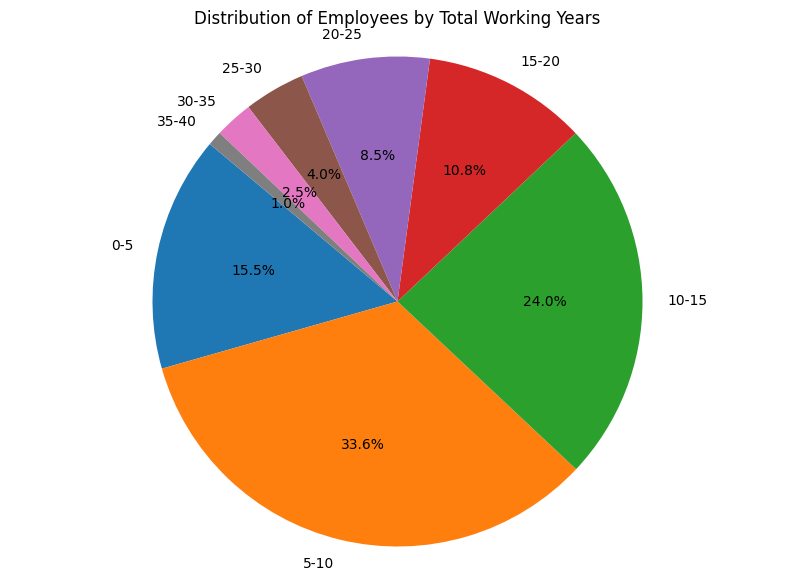

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define total working years bins and labels (excluding 40-45)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Create a new column 'WorkingYearsGroup' with the specified bins and labels
df['WorkingYearsGroup'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)

# Filter out any rows where the 'WorkingYearsGroup' is '40-45'
df = df[df['TotalWorkingYears'] < 40]

# Aggregate the data by 'WorkingYearsGroup'
working_years_group_counts = df['WorkingYearsGroup'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(working_years_group_counts, labels=working_years_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Total Working Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df1 = df.select_dtypes('object')
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
df2 = df.select_dtypes('int64')
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

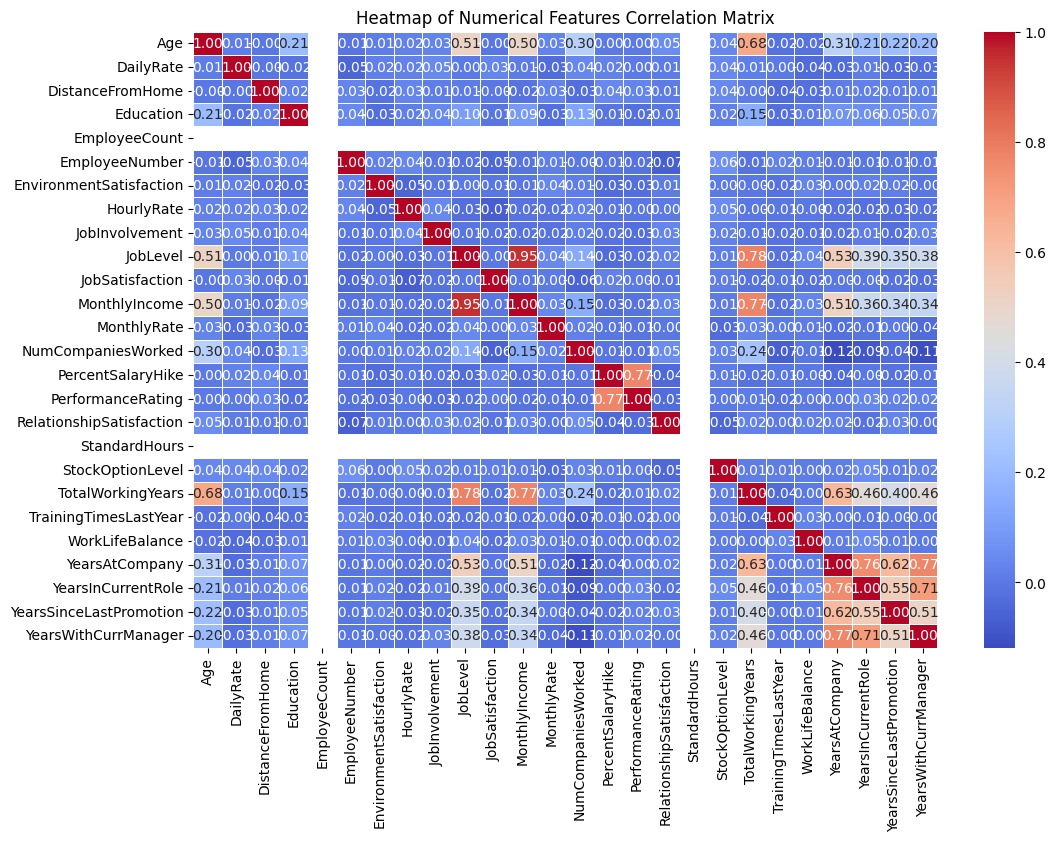

In [ ]:
df_numerical = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numerical Features Correlation Matrix')
plt.show()

Accuracy: 0.7596371882086168
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       380
           1       0.30      0.54      0.38        61

    accuracy                           0.76       441
   macro avg       0.61      0.67      0.62       441
weighted avg       0.83      0.76      0.79       441




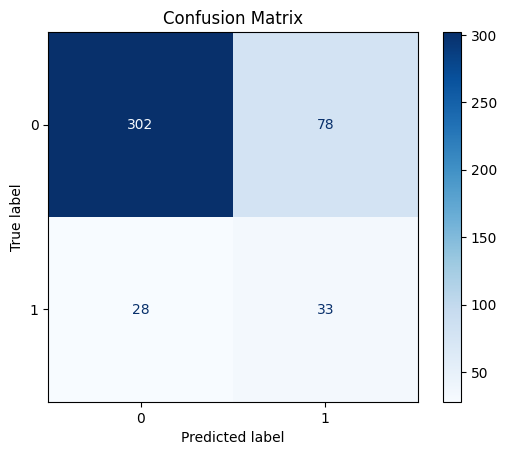

In [ ]:
#nb(naive base) - 75
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes classifiers don't provide feature importances directly, so the feature importance plot is omitted.

Accuracy: 0.8616780045351474
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441




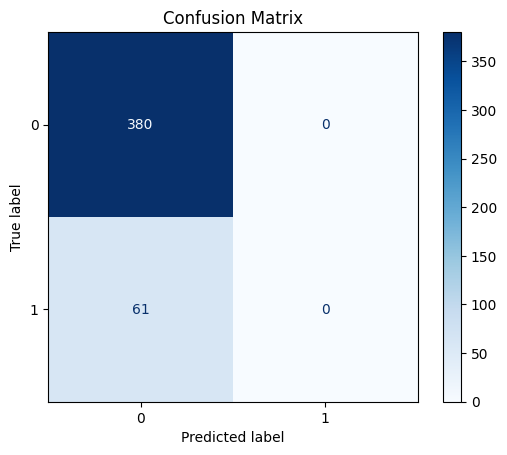

In [ ]:
#svm(support vector machine) - 86
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

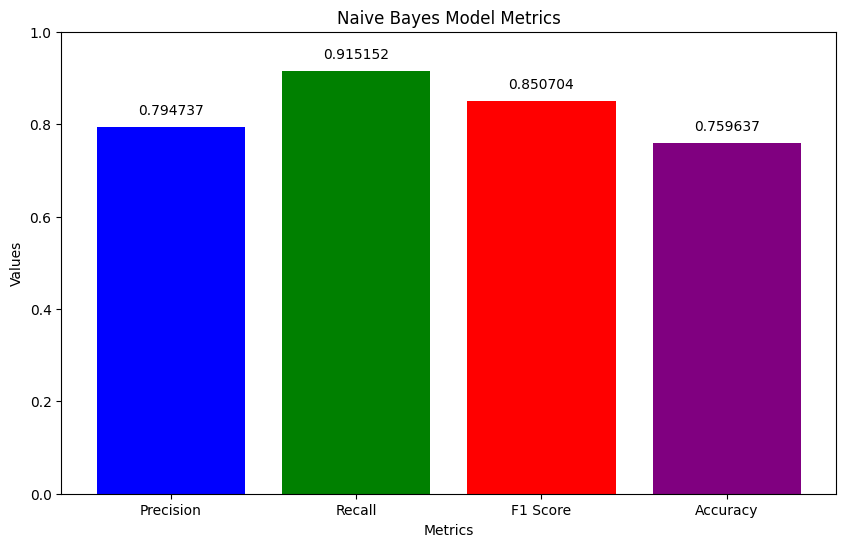

In [ ]:
#Nb
import matplotlib.pyplot as plt

# Data
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.297, 0.541, 0.384, 0.760]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Performance Metrics for Naive Bayes Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)

# Adding value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')

# Show plot
plt.show()

Accuracy: 0.8707482993197279
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.58      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.73      0.61      0.64       441
weighted avg       0.85      0.87      0.85       441




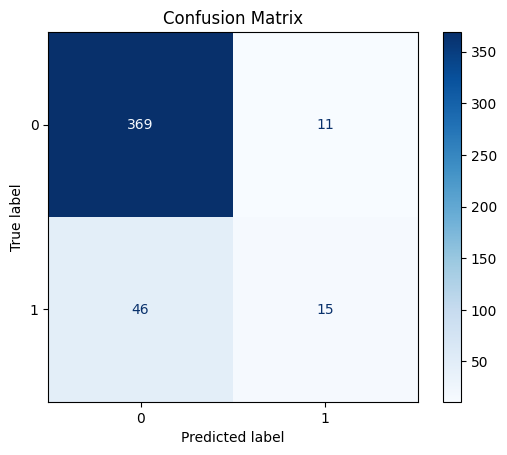

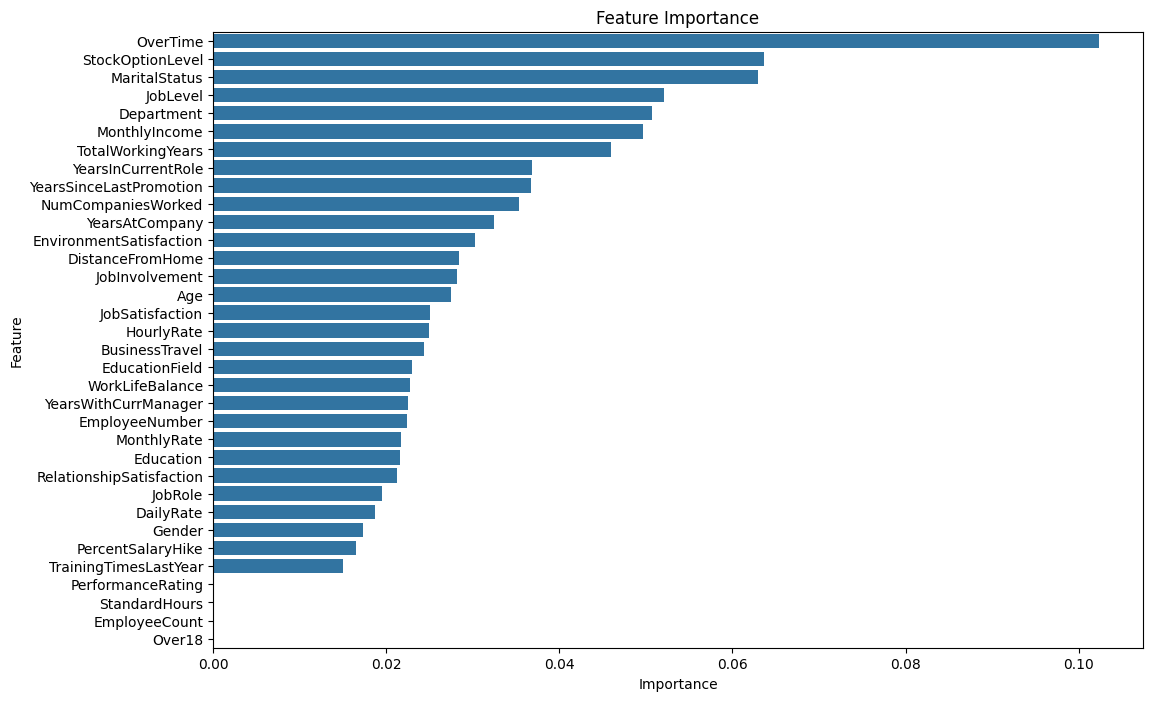

In [ ]:
#xg boost(87)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



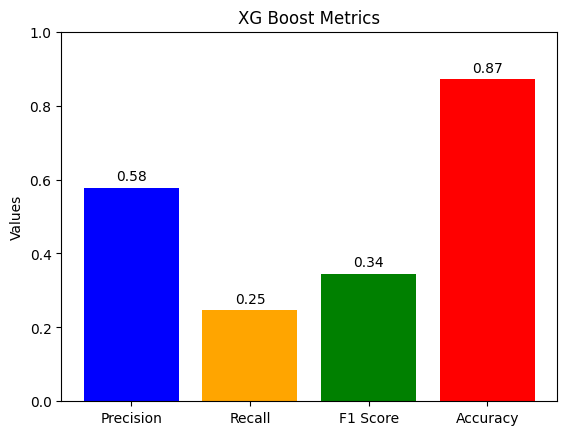

In [ ]:
#xg boost
import matplotlib.pyplot as plt

# Data for the graph
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.576923077, 0.245901639, 0.344827586, 0.870748299]

# Plotting the graph
fig, ax = plt.subplots()

ax.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])

ax.set_ylabel('Values')
ax.set_title('XG Boost Metrics')

for i, value in enumerate(values):
    ax.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.ylim(0, 1)
plt.show()

Accuracy: 0.873015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.69      0.15      0.24        61

    accuracy                           0.87       441
   macro avg       0.79      0.57      0.59       441
weighted avg       0.85      0.87      0.84       441




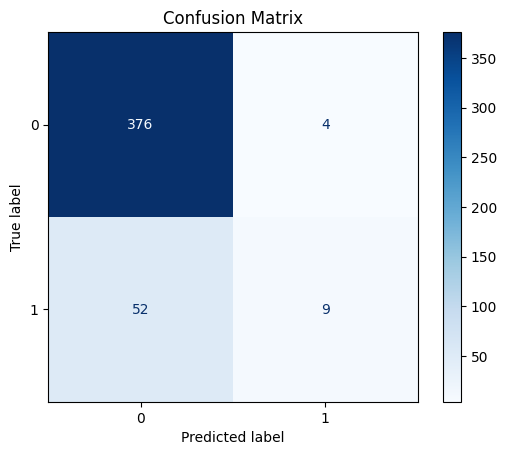

In [ ]:
#knn(k-nearest neighbour - 87)
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number of neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

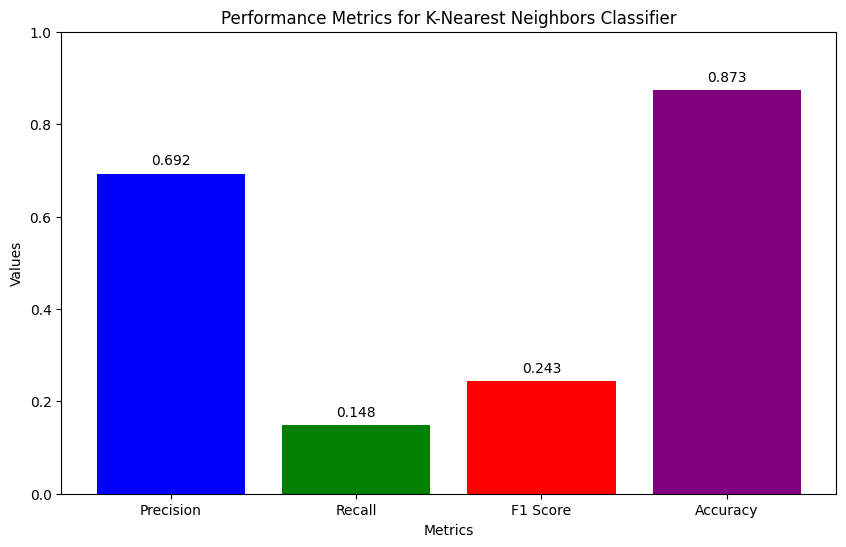

In [ ]:
#KNN
import matplotlib.pyplot as plt

# Data
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.692, 0.148, 0.243, 0.873]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Performance Metrics for K-Nearest Neighbors Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)

# Adding value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')

# Show plot
plt.show()

Accuracy: 0.7913832199546486
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.28      0.31      0.29        61

    accuracy                           0.79       441
   macro avg       0.58      0.59      0.58       441
weighted avg       0.80      0.79      0.80       441




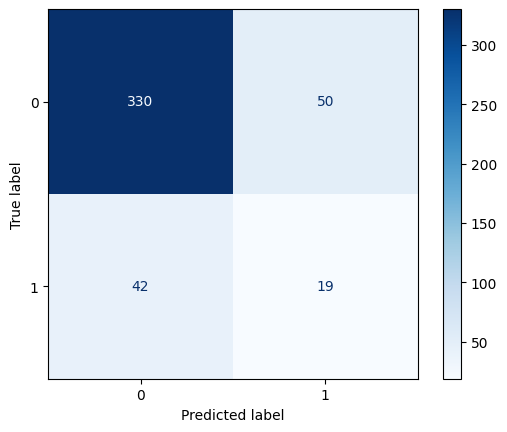

In [ ]:
#dt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

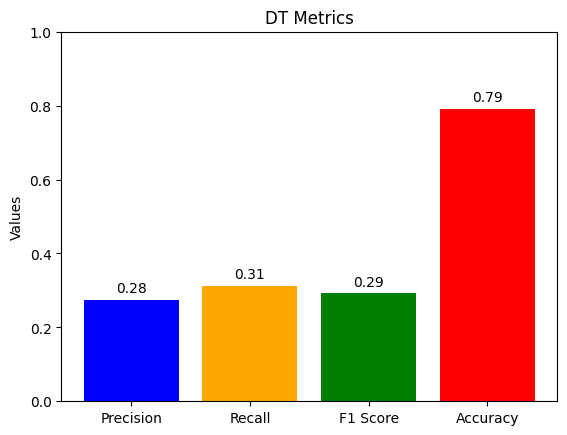

In [ ]:
#dt
import matplotlib.pyplot as plt

# Data for the graph
metrics_dt = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values_dt = [0.275362319, 0.31147541, 0.292307692, 0.79138322]

# Plotting the graph for DT
fig, ax = plt.subplots()

ax.bar(metrics_dt, values_dt, color=['blue', 'orange', 'green', 'red'])

ax.set_ylabel('Values')
ax.set_title('DT Metrics')

for i, value in enumerate(values_dt):
    ax.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.ylim(0, 1)
plt.show()

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.40      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.63      0.52      0.52       441
weighted avg       0.80      0.86      0.81       441




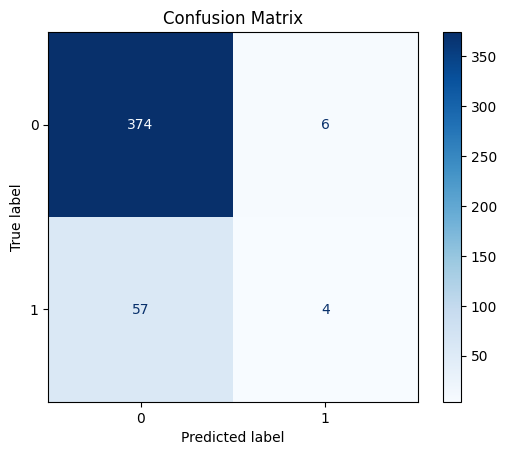

In [ ]:
#random forest - 85
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display feature importance
#feature_importances = clf.feature_importances_
#features = X.columns
#importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plt.figure(figsize=(12, 8))
#sns.barplot(x='Importance', y='Feature', data=importance_df)
#plt.title('Feature Importance')
#plt.show()

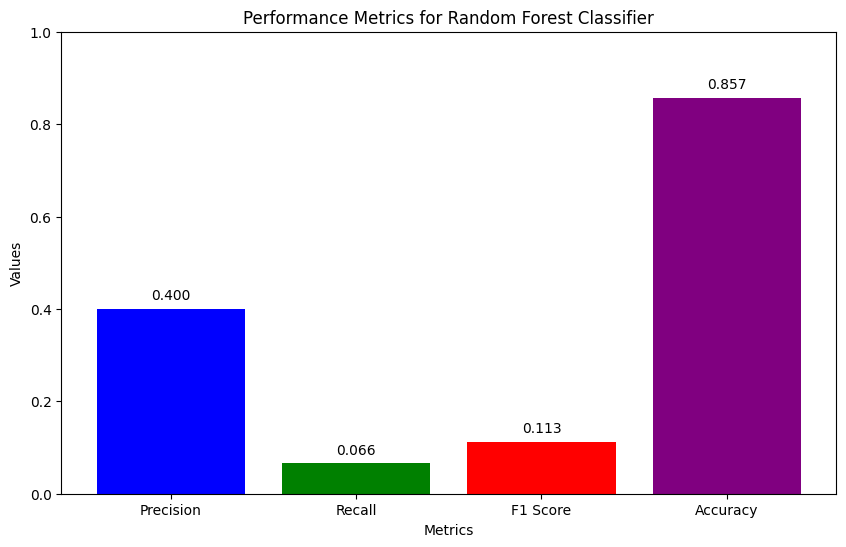

In [ ]:
#RF
import matplotlib.pyplot as plt

# Data for Random Forest Classifier
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.4, 0.066, 0.113, 0.857]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Performance Metrics for Random Forest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)

# Adding value labels on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')

# Show plot
plt.show()

Feature YearsCurrentRole is not in the DataFrame. Please check the feature names.


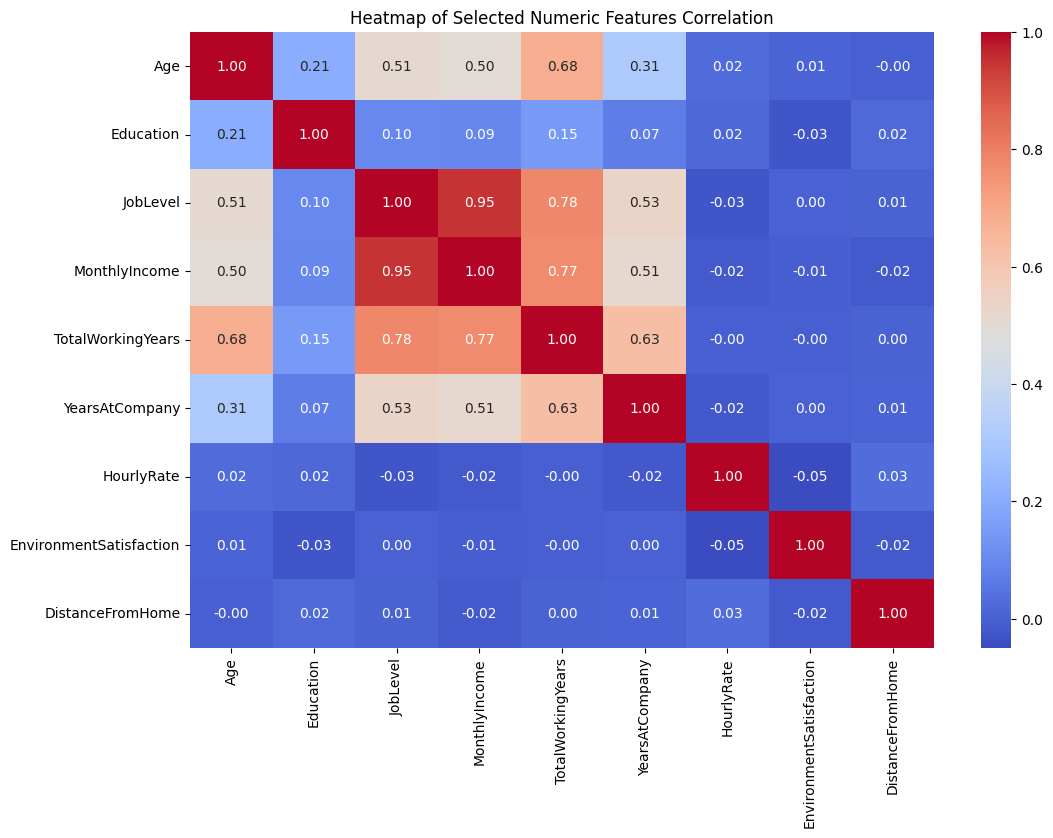

In [ ]:
#heatmap for 10 values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame, ensure it is properly defined
# df2 = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your actual data

# Ensure the DataFrame contains the specified columns
selected_features = ['Age', 'Education', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsCurrentRole', 'HourlyRate', 'EnvironmentSatisfaction', 'DistanceFromHome']

# Check if all selected features are in the DataFrame
for feature in selected_features:
    if feature not in df2.columns:
        print(f"Feature {feature} is not in the DataFrame. Please check the feature names.")
        selected_features.remove(feature)

# Select the specific 10 features you want
df2_subset = df2[selected_features]

# Plot the heatmap
plt.figure(figsize=(12, 8))
corr = df2_subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Selected Numeric Features Correlation')
plt.show()

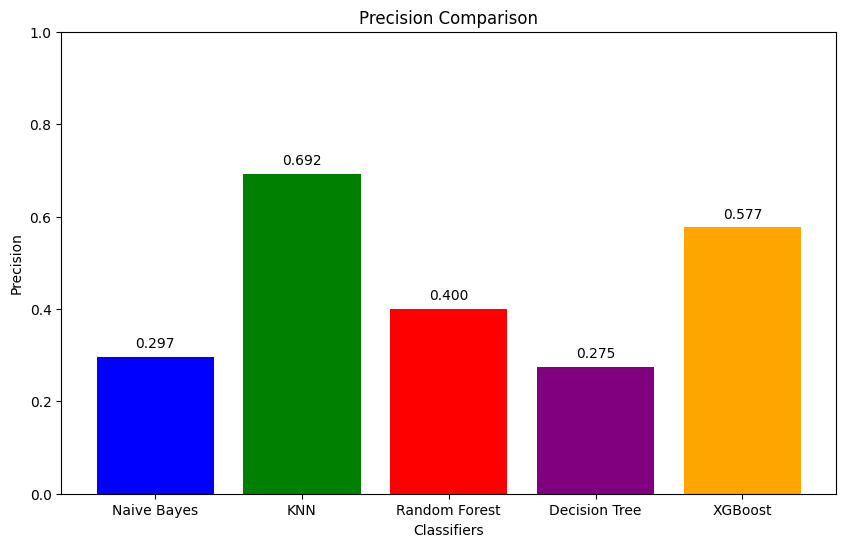

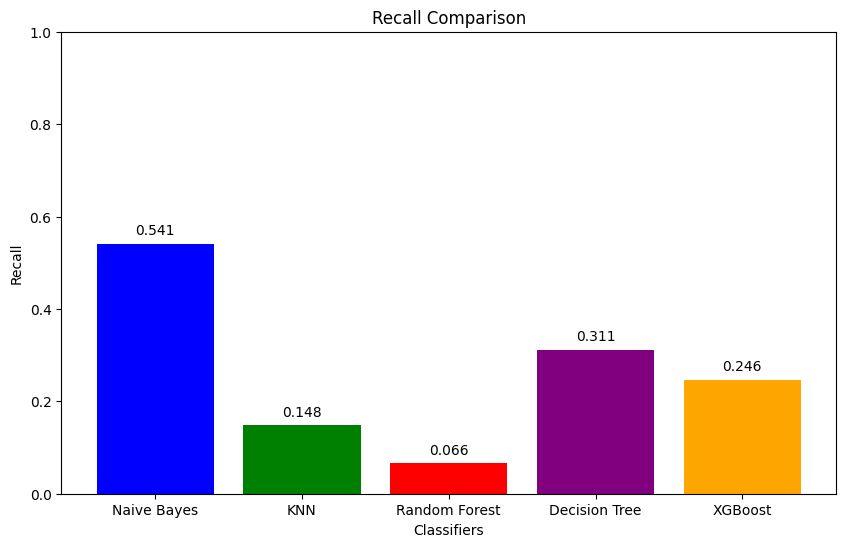

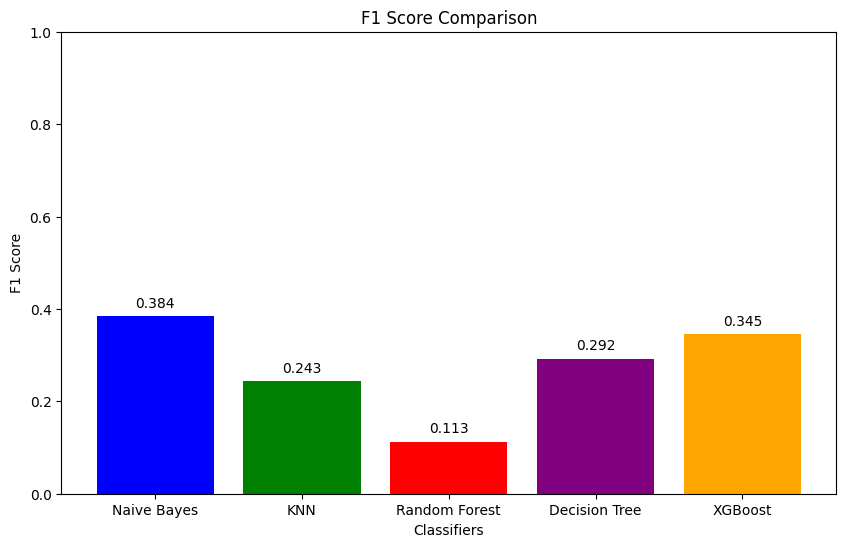

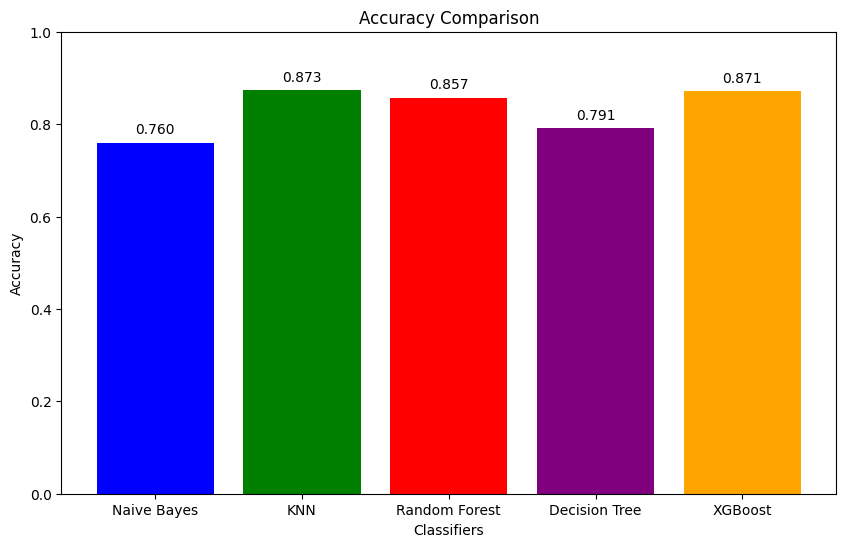

In [ ]:
import matplotlib.pyplot as plt

# Data
classifiers = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'XGBoost']

# Precision values for each classifier
precision_values = [0.297, 0.692, 0.4, 0.275, 0.577]

# Recall values for each classifier
recall_values = [0.541, 0.148, 0.066, 0.311, 0.246]

# F1 Score values for each classifier
f1_values = [0.384, 0.243, 0.113, 0.292, 0.345]

# Accuracy values for each classifier
accuracy_values = [0.760, 0.873, 0.857, 0.791, 0.871]

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.bar(classifiers, precision_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Precision Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.ylim(0, 1)
for i, value in enumerate(precision_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.bar(classifiers, recall_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Recall Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.ylim(0, 1)
for i, value in enumerate(recall_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('F1 Score Comparison')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for i, value in enumerate(f1_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

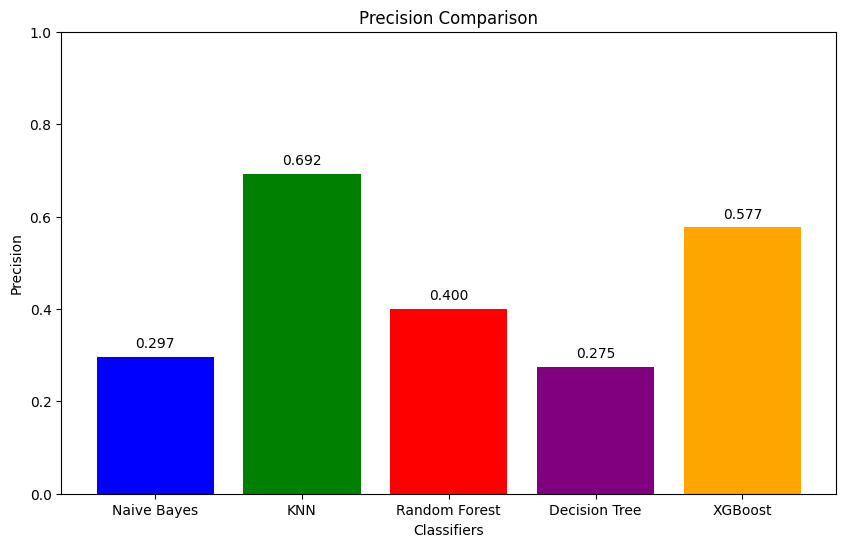

In [ ]:
#PRECISION COMPARISION
import matplotlib.pyplot as plt

# Data for Precision
classifiers = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'XGBoost']
precision_values = [0.297, 0.692, 0.4, 0.275, 0.577]

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.bar(classifiers, precision_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Precision Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.ylim(0, 1)
for i, value in enumerate(precision_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

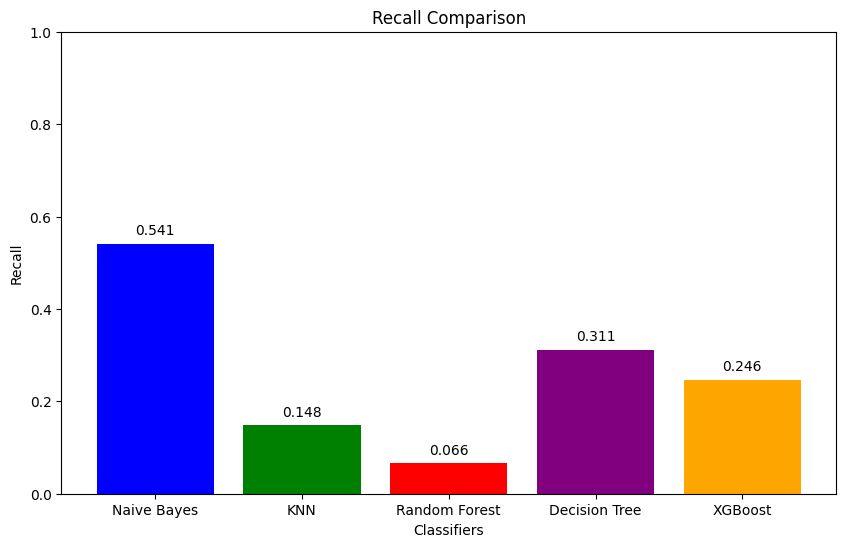

In [ ]:
#RECALL COMPARISON
import matplotlib.pyplot as plt

# Data for Recall
classifiers = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'XGBoost']
recall_values = [0.541, 0.148, 0.066, 0.311, 0.246]

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.bar(classifiers, recall_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Recall Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.ylim(0, 1)
for i, value in enumerate(recall_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

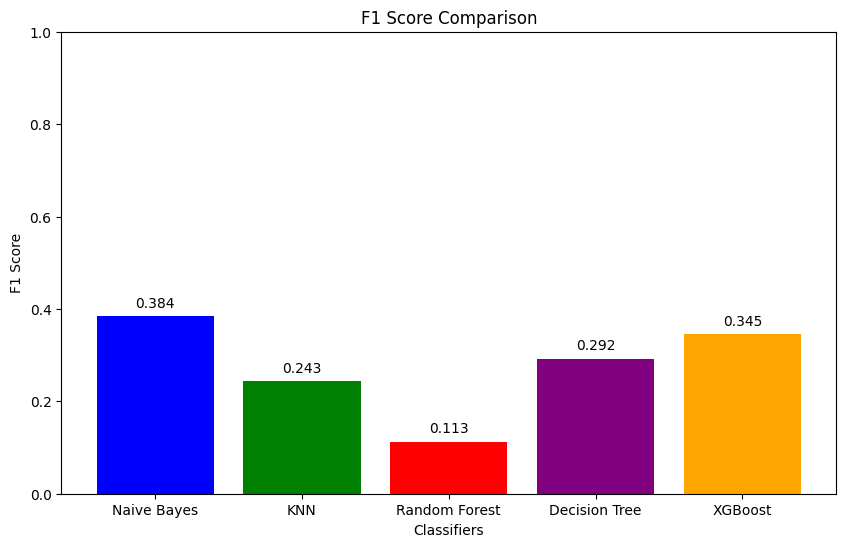

In [ ]:
#F1 COMPARISION
import matplotlib.pyplot as plt

# Data for F1 Score
classifiers = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'XGBoost']
f1_values = [0.384, 0.243, 0.113, 0.292, 0.345]

# Plotting F1 Score
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('F1 Score Comparison')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for i, value in enumerate(f1_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

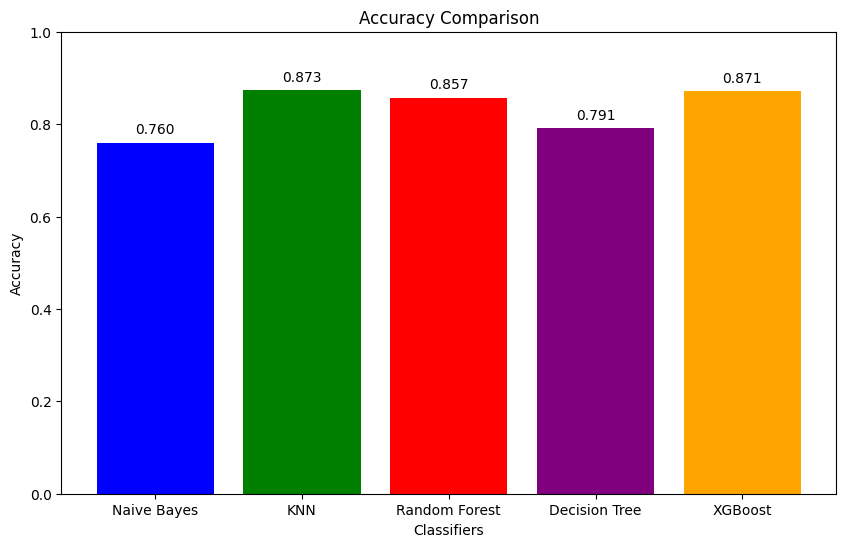

In [ ]:
#ACCURACY COMPARISION
import matplotlib.pyplot as plt

# Data for Accuracy
classifiers = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'XGBoost']
accuracy_values = [0.760, 0.873, 0.857, 0.791, 0.871]

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center')
plt.show()

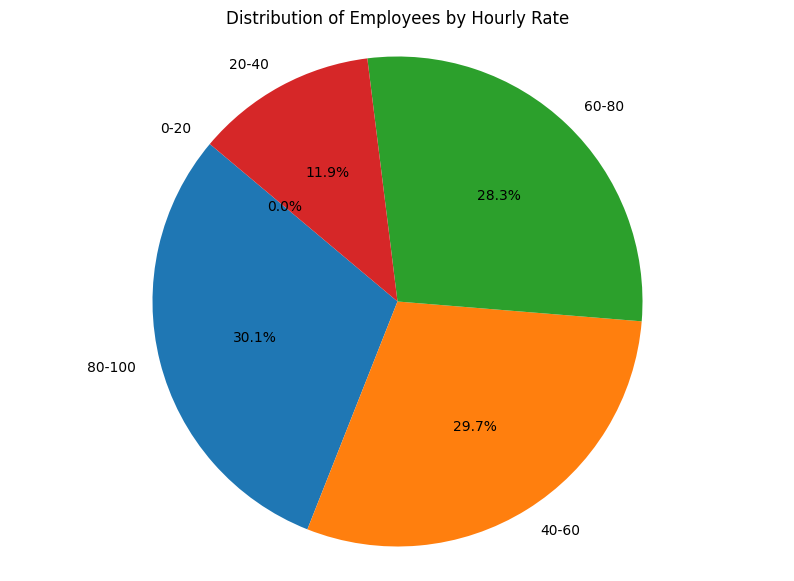

In [ ]:
#hourly rate
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the given CSV file
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define hourly rate bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
df['HourlyRateGroup'] = pd.cut(df['HourlyRate'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'HourlyRateGroup'
hourly_rate_group_counts = df['HourlyRateGroup'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(hourly_rate_group_counts, labels=hourly_rate_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Hourly Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

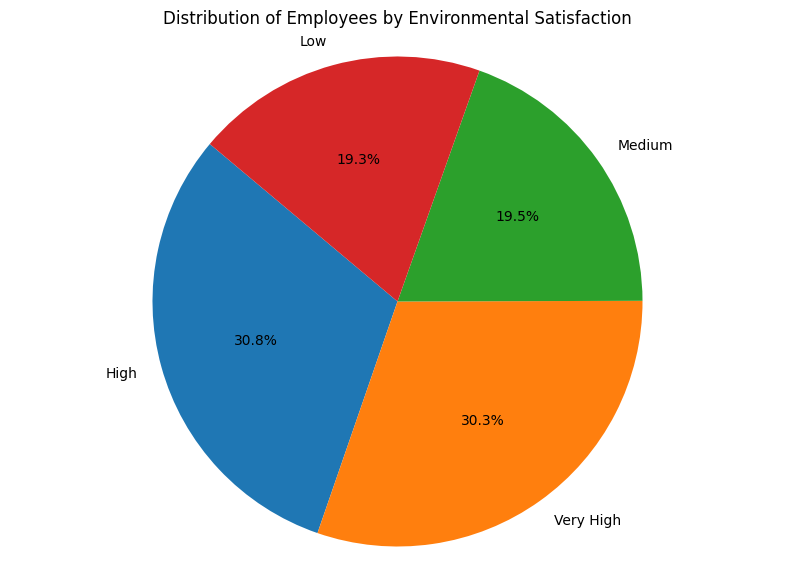

In [ ]:
#Employees by Environmental Satisfaction
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the given CSV file
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Aggregate the data by 'EnvironmentSatisfaction'
environment_satisfaction_counts = df['EnvironmentSatisfaction'].value_counts()

# Define environment satisfaction labels (adjust according to actual data definitions if needed)
environment_satisfaction_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Map the environment satisfaction levels to the labels
environment_satisfaction_counts.index = environment_satisfaction_counts.index.map(environment_satisfaction_labels)

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(environment_satisfaction_counts, labels=environment_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Environmental Satisfaction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

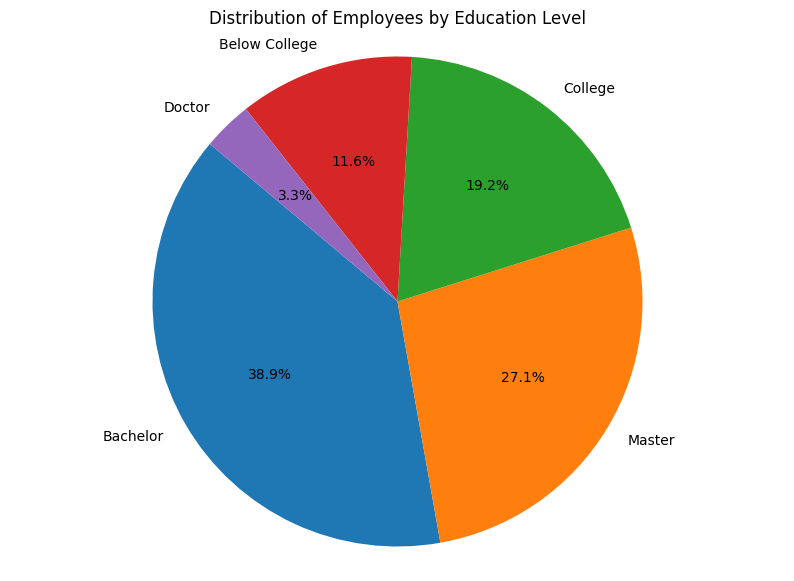

In [ ]:
#Education Level
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a CSV file, we'll load it into a DataFrame.
# Replace 'employee_data.csv' with the actual path to your CSV file.
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Aggregate the data by 'Education'
education_counts = df['Education'].value_counts()

# Define education level labels (adjust according to actual data definitions)
education_labels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

# Map the education levels to the labels
education_counts.index = education_counts.index.map(education_labels)

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

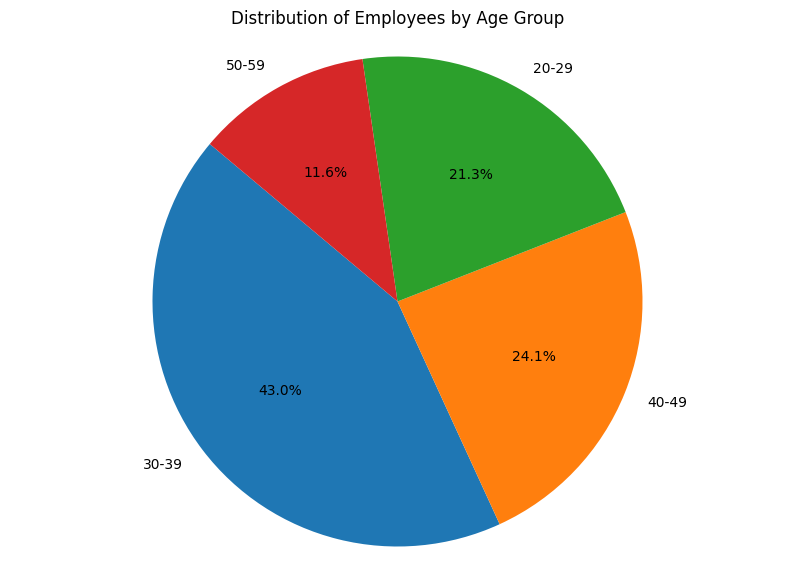

In [ ]:
#Age Group
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a CSV file, we'll load it into a DataFrame.
# Replace 'employee_data.csv' with the actual path to your CSV file.
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Create age bins
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'AgeGroup'
age_group_counts = df['AgeGroup'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

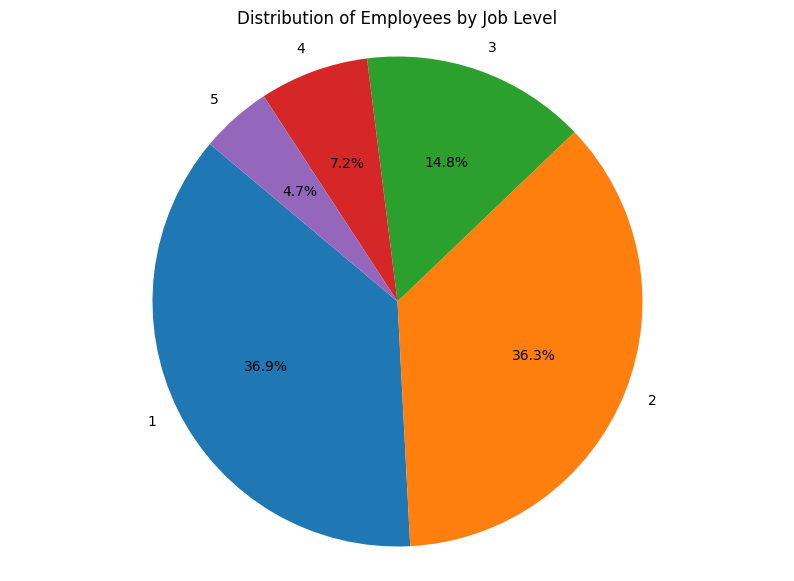

In [ ]:
#Job Level
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a CSV file, we'll load it into a DataFrame.
# Replace 'employee_data.csv' with the actual path to your CSV file.
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Aggregate the data by 'JobLevel'
job_level_counts = df['JobLevel'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(job_level_counts, labels=job_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Job Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

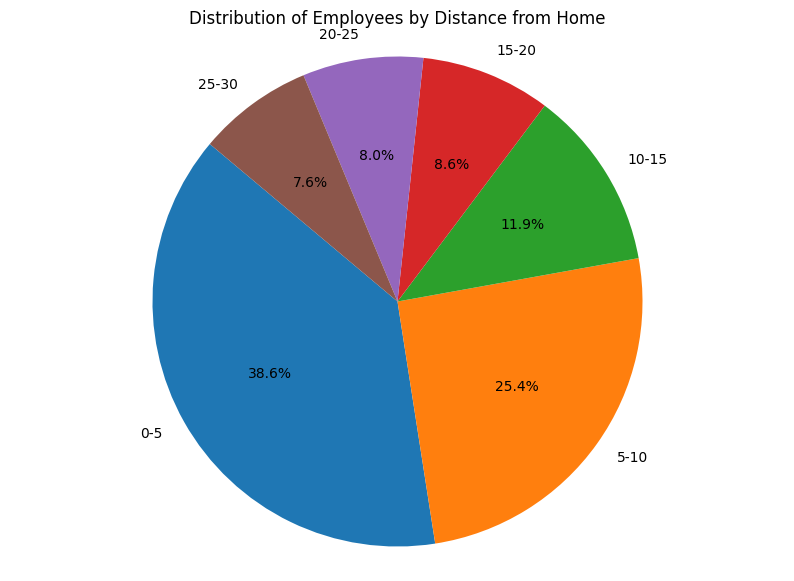

In [ ]:
#distance from home
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define distance from home bins and labels
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust these bins as necessary for your dataset
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

# Create a new column 'DistanceFromHomeGroup' with the specified bins and labels
df['DistanceFromHomeGroup'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'DistanceFromHomeGroup'
distance_from_home_group_counts = df['DistanceFromHomeGroup'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(distance_from_home_group_counts, labels=distance_from_home_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Distance from Home')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

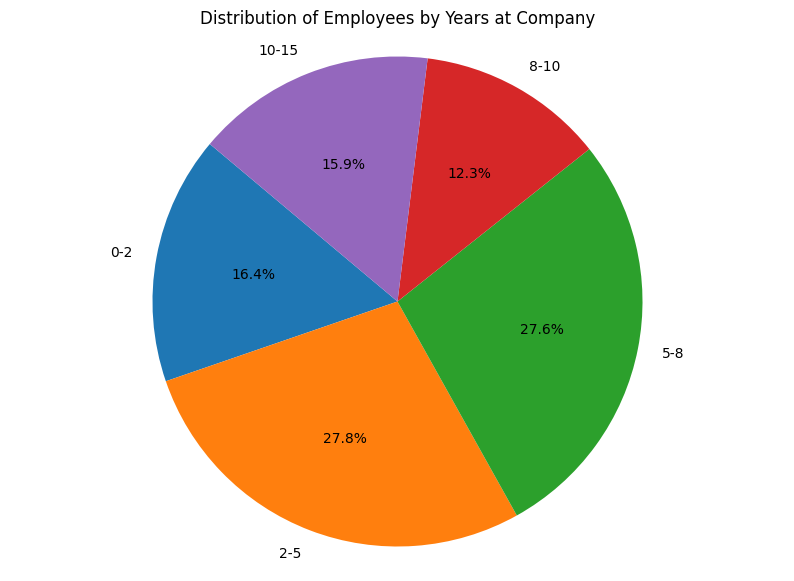

In [ ]:
#years at company
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define years at company bins and labels
bins = [0, 2, 5, 8, 10, 15]  # Adjust these bins as necessary for your dataset
labels = ['0-2', '2-5', '5-8', '8-10', '10-15']

# Create a new column 'YearsAtCompanyGroup' with the specified bins and labels
df['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'YearsAtCompanyGroup'
years_at_company_group_counts = df['YearsAtCompanyGroup'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(years_at_company_group_counts, labels=years_at_company_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Years at Company')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

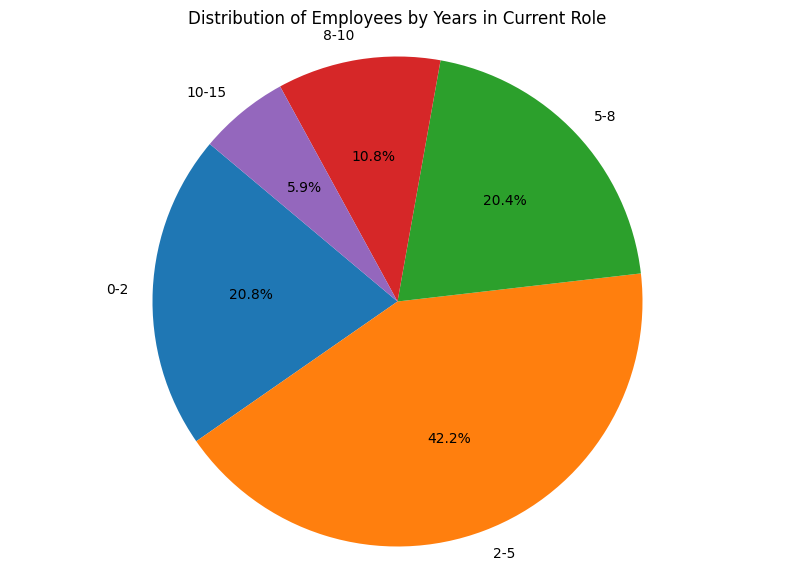

In [ ]:
#years in current role
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
# Define total years in current role bins and labels
bins = [0, 2, 5, 8, 10, 15]  # Adjust these bins as necessary for your dataset
labels = ['0-2', '2-5', '5-8', '8-10', '10-15']

# Create a new column 'YearsInRoleGroup' with the specified bins and labels
df['YearsInRoleGroup'] = pd.cut(df['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'YearsInRoleGroup'
years_in_role_group_counts = df['YearsInRoleGroup'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(years_in_role_group_counts, labels=years_in_role_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Years in Current Role')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

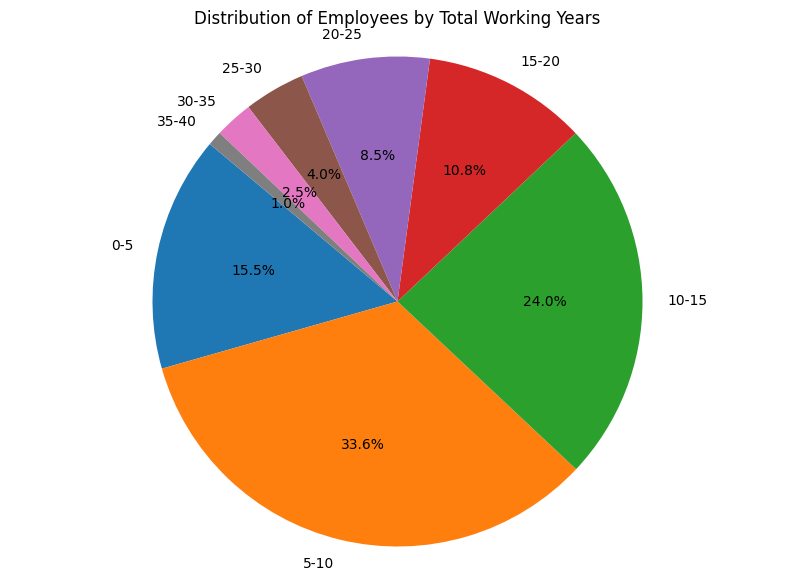

In [ ]:
#total working years
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define total working years bins and labels (excluding 40-45)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Create a new column 'WorkingYearsGroup' with the specified bins and labels
df['WorkingYearsGroup'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)

# Filter out any rows where the 'WorkingYearsGroup' is '40-45'
df = df[df['TotalWorkingYears'] < 40]

# Aggregate the data by 'WorkingYearsGroup'
working_years_group_counts = df['WorkingYearsGroup'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(working_years_group_counts, labels=working_years_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Total Working Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

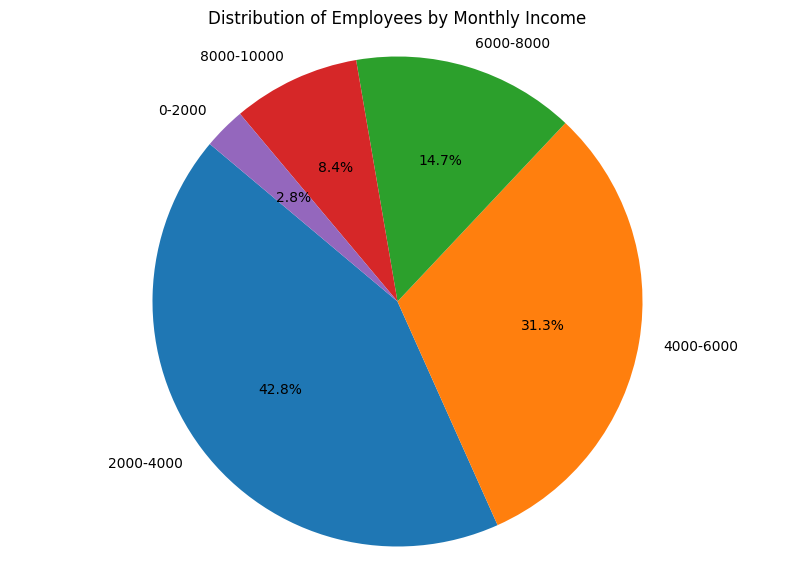

In [ ]:
#monthly income
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a CSV file, we'll load it into a DataFrame.
# Replace 'employee_data.csv' with the actual path to your CSV file.
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Define monthly income bins and labels
bins = [0, 2000, 4000, 6000, 8000, 10000]
labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000']
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'IncomeGroup'
income_group_counts = df['IncomeGroup'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Monthly Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

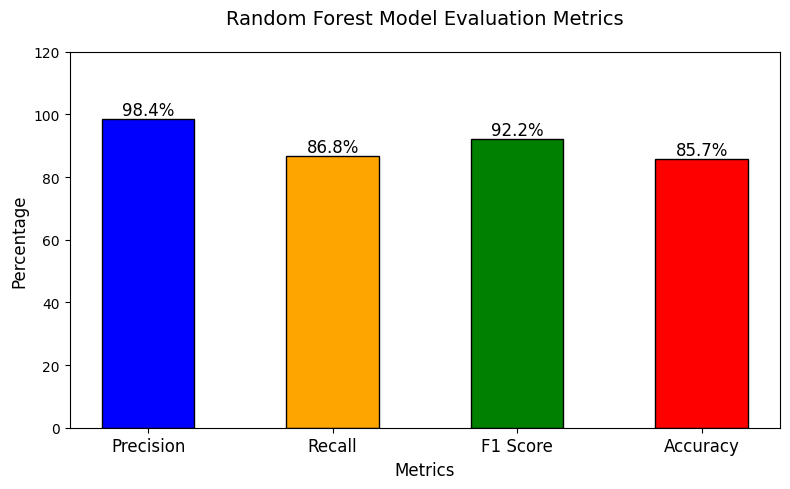

In [ ]:
#rf
import matplotlib.pyplot as plt

# Data for the Random Forest model evaluation metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.984210526, 0.86774942, 0.922318126, 0.857142857]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Random Forest Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

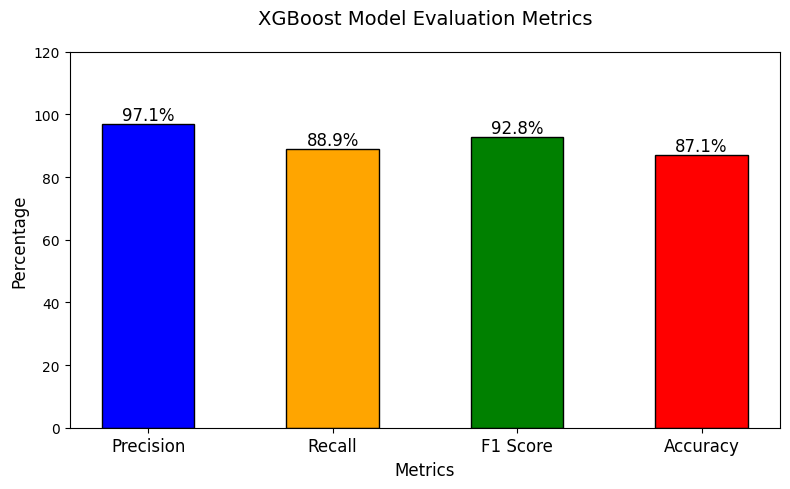

In [ ]:
#xg boost
import matplotlib.pyplot as plt

# Data for the XGBoost model evaluation metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.971052632, 0.889156627, 0.928301887, 0.870748299]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('XGBoost Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

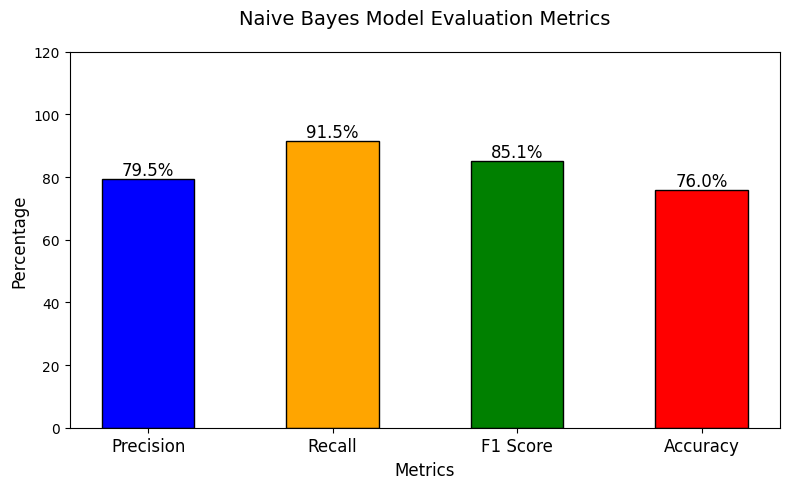

In [ ]:
#nb
import matplotlib.pyplot as plt

# Data for the Naive Bayes model evaluation metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.794736842, 0.915151515, 0.850704225, 0.759637188]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Naive Bayes Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

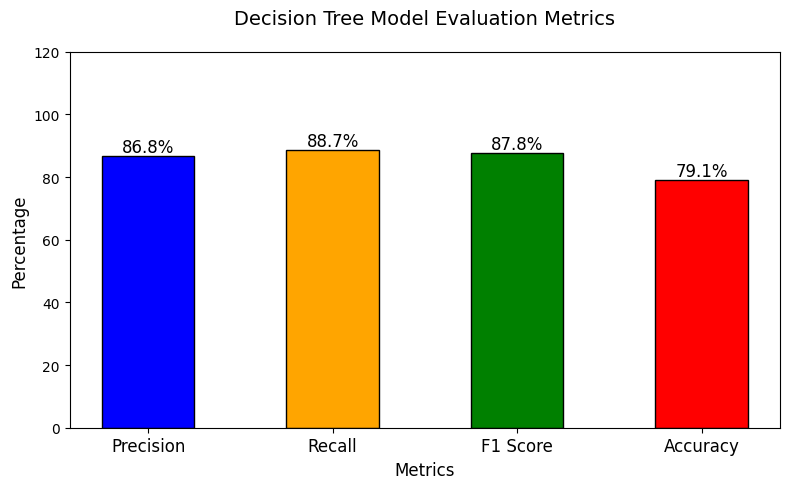

In [ ]:
#dt
import matplotlib.pyplot as plt

# Data for the Decision Tree model evaluation metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.868421053, 0.887096774, 0.877659574, 0.79138322]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Decision Tree Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

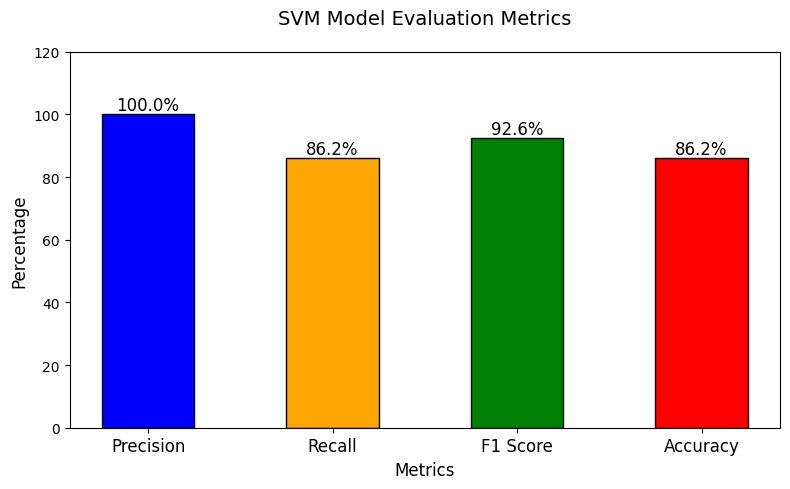

In [ ]:
#svm graph
import matplotlib.pyplot as plt

# Data from the provided metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [1.0, 0.861678005, 0.925700365, 0.861678005]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values and smaller bar width
fig, ax = plt.subplots(figsize=(8, 5))  # Increased size for a larger chart
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('SVM Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

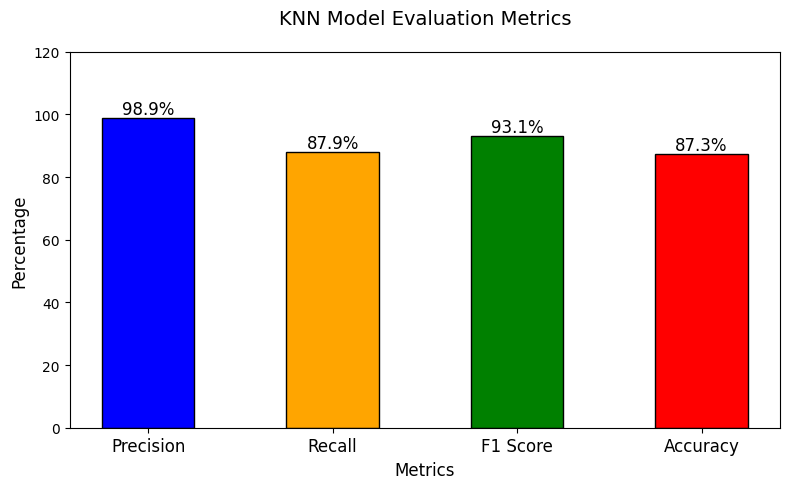

In [ ]:
#knn
import matplotlib.pyplot as plt

# Data for the KNN model evaluation metrics
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [0.989473684, 0.878504673, 0.930693069, 0.873015873]

# Convert the values to percentages
values_percent = [value * 100 for value in values]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(8, 5))  # Adjust size as needed
bars = ax.bar(metrics, values_percent, color=['blue', 'orange', 'green', 'red'], edgecolor='black', width=0.5)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('KNN Model Evaluation Metrics', fontsize=14, pad=20)
ax.set_ylim(0, 120)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)

# Adjust x-ticks and x-tick labels
ax.set_xticks(range(len(metrics)))  # Set the position of ticks
ax.set_xticklabels(metrics, rotation=0, ha='center', fontsize=12)  # Adjust font size and alignment

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

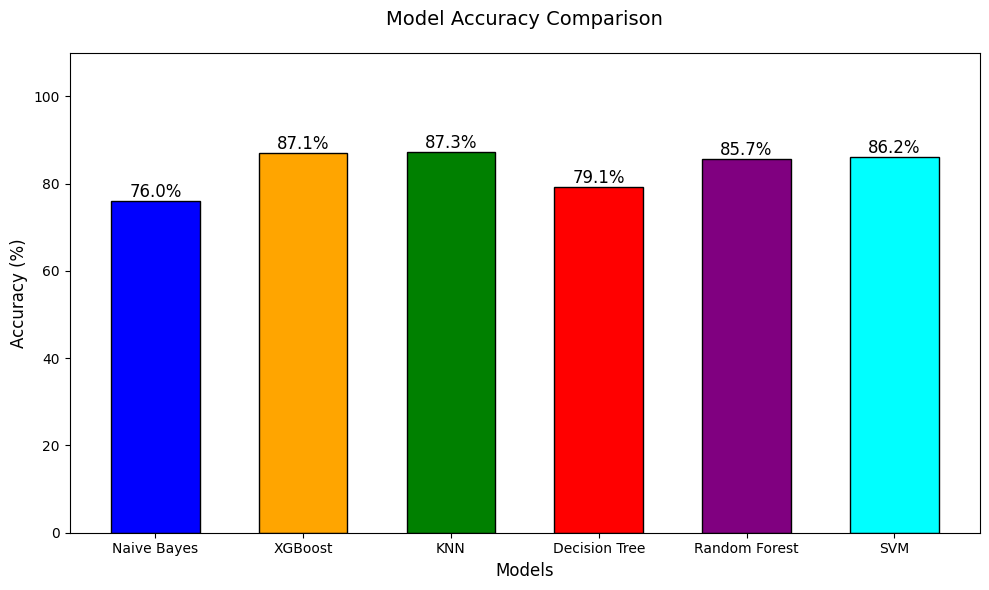

In [ ]:
#accuracy comparison
import matplotlib.pyplot as plt

# Data for the model accuracies
models = ['Naive Bayes', 'XGBoost', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [0.759637188, 0.870748299, 0.873015873, 0.79138322, 0.857142857, 0.861678005]

# Convert the values to percentages
accuracies_percent = [value * 100 for value in accuracies]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
bars = ax.bar(models, accuracies_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'], edgecolor='black', width=0.6)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Model Accuracy Comparison', fontsize=14, pad=20)
ax.set_ylim(0, 110)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

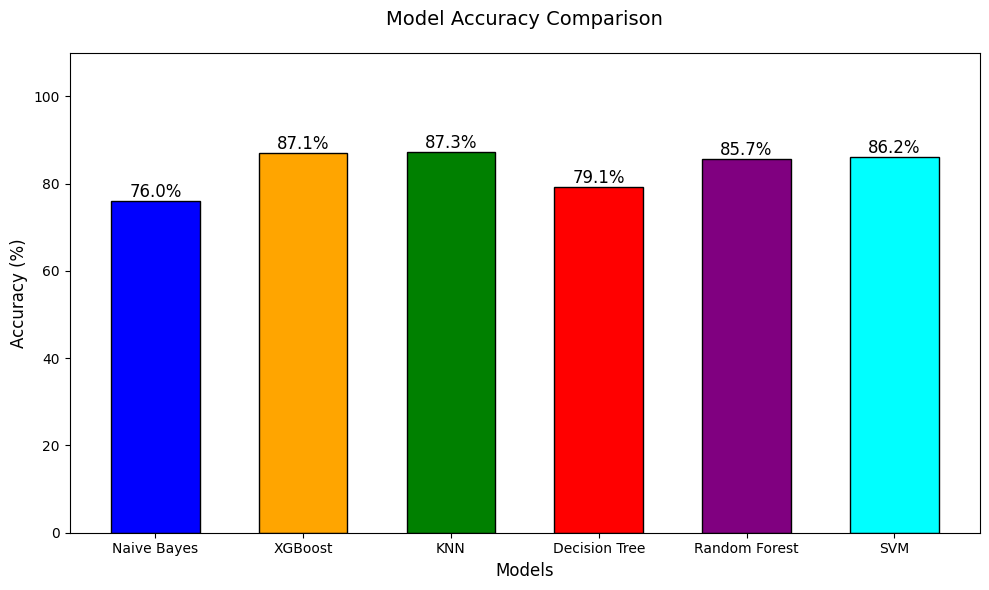

In [ ]:
#accuracy comparison
import matplotlib.pyplot as plt

# Data for the model accuracies
models = ['Naive Bayes', 'XGBoost', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [0.759637188, 0.870748299, 0.873015873, 0.79138322, 0.857142857, 0.861678005]

# Convert the values to percentages
accuracies_percent = [value * 100 for value in accuracies]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
bars = ax.bar(models, accuracies_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'], edgecolor='black', width=0.6)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Model Accuracy Comparison', fontsize=14, pad=20)
ax.set_ylim(0, 110)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

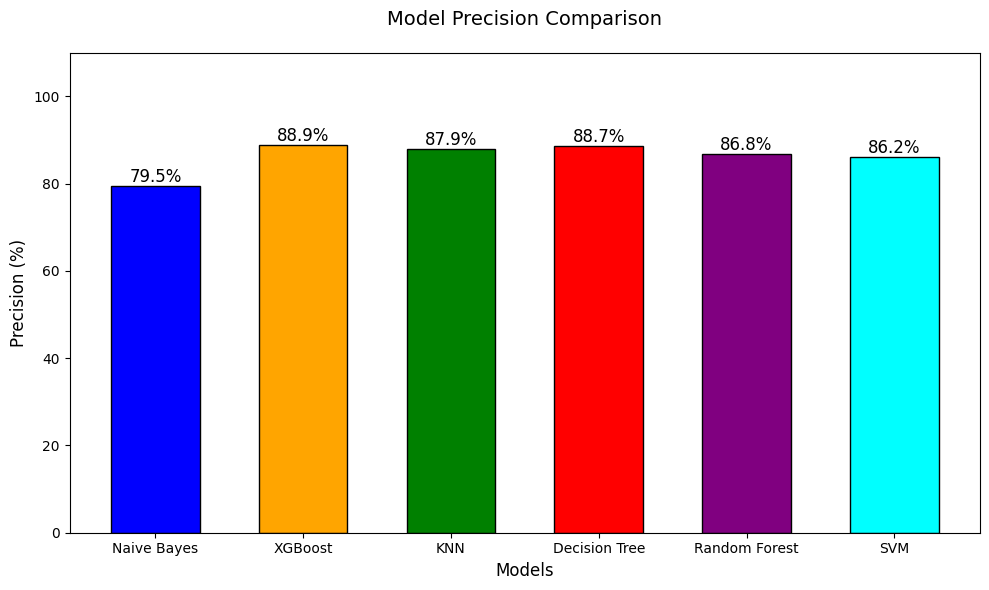

In [ ]:
#precision comparison
import matplotlib.pyplot as plt

# Data for the model precisions
models = ['Naive Bayes', 'XGBoost', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
precisions = [0.794737, 0.889156627, 0.878504673, 0.887096774, 0.86774942, 0.861678005]

# Convert the values to percentages
precisions_percent = [value * 100 for value in precisions]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
bars = ax.bar(models, precisions_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'], edgecolor='black', width=0.6)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Model Precision Comparison', fontsize=14, pad=20)
ax.set_ylim(0, 110)
ax.set_ylabel('Precision (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

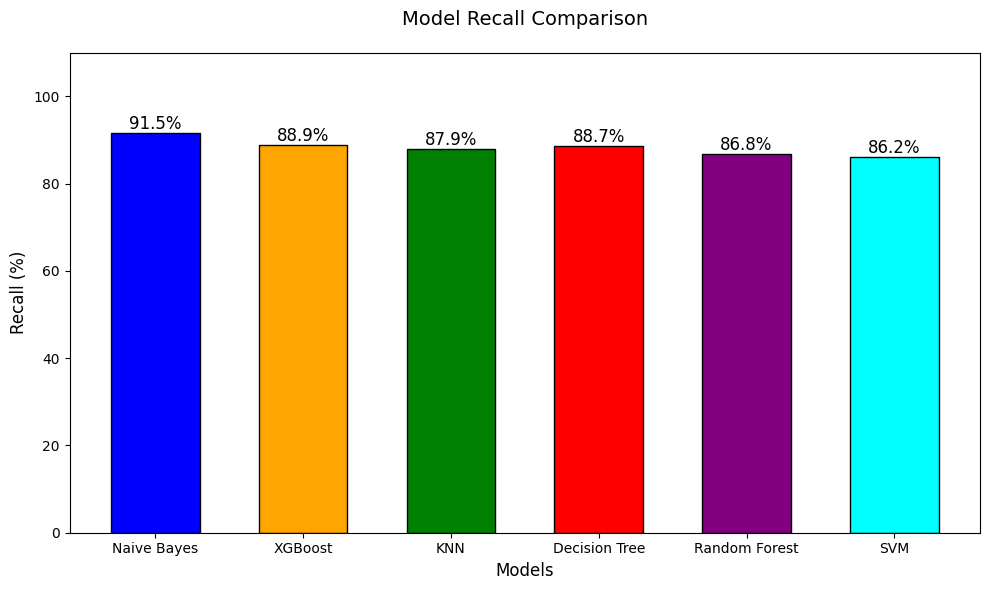

In [ ]:
#recall comparison
import matplotlib.pyplot as plt

# Data for the model recalls
models = ['Naive Bayes', 'XGBoost', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
recalls = [0.915151515, 0.889156627, 0.878504673, 0.887096774, 0.86774942, 0.861678005]

# Convert the values to percentages
recalls_percent = [value * 100 for value in recalls]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
bars = ax.bar(models, recalls_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'], edgecolor='black', width=0.6)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Model Recall Comparison', fontsize=14, pad=20)
ax.set_ylim(0, 110)
ax.set_ylabel('Recall (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

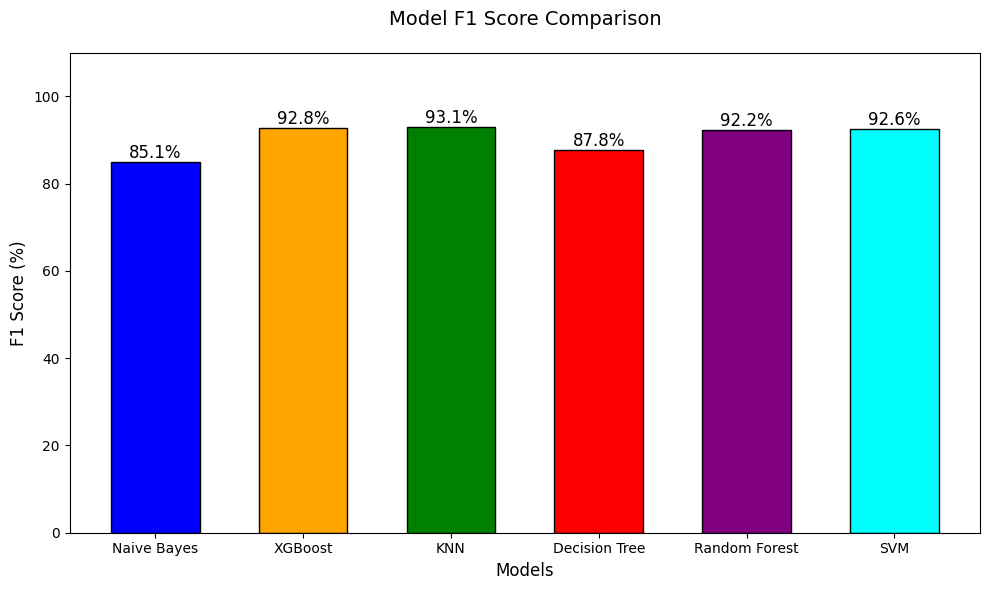

In [ ]:
#f1 comparison
import matplotlib.pyplot as plt

# Data for the model F1 scores
models = ['Naive Bayes', 'XGBoost', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
f1_scores = [0.850704225, 0.928301887, 0.930693069, 0.877659574, 0.922318126, 0.925700365]

# Convert the values to percentages
f1_scores_percent = [value * 100 for value in f1_scores]

# Create the bar chart with percentage values
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed
bars = ax.bar(models, f1_scores_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'], edgecolor='black', width=0.6)  # Adjust width if needed

# Adding value labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=12)  # Centered alignment

# Set title and labels
ax.set_title('Model F1 Score Comparison', fontsize=14, pad=20)
ax.set_ylim(0, 110)
ax.set_ylabel('F1 Score (%)', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()